# 📌 CREDIT RISK PREDICTION - DAY 4: Model Optimization & Explainability

### 🎯 Goals
- Tune Logistic Regression and XGBoost using GridSearchCV
- Evaluate best models using AUC
- Explain XGBoost predictions using SHAP
- Save final model and SHAP summary plot

In [3]:
# Step 1: Importing Library and Load Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier

# Load and preprocess
df = pd.read_csv('../data/cleaned_credit_data.csv')
target = 'loan_status'
X_raw = df.drop(columns=[target])
y = df[target]
X = pd.get_dummies(X_raw, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
# Step 2: GridSearchCV — Logistic Regression
param_grid_log = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}

grid_log = GridSearchCV(
    LogisticRegression(), param_grid_log, cv=5, scoring='roc_auc', n_jobs=-1
)
grid_log.fit(X_train_scaled, y_train)

print("Best Logistic Regression Params:", grid_log.best_params_)
print("Best AUC:", grid_log.best_score_)


Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best AUC: 0.8759872864022945


In [5]:
# Step 3: GridSearchCV — XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

grid_xgb = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1
)
grid_xgb.fit(X_train, y_train)

print("Best XGBoost Params:", grid_xgb.best_params_)
print("Best AUC:", grid_xgb.best_score_)


Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Best AUC: 0.936765611578787


In [6]:
# Step 4: Save the Best Model (.pkl)
joblib.dump(grid_xgb.best_estimator_, '../models/final_xgb_model.pkl')
print("✅ Final XGBoost model saved to models/final_xgb_model.pkl")



✅ Final XGBoost model saved to models/final_xgb_model.pkl


✅ Feature importance plot saved to reports/feature_importance_xgb.png


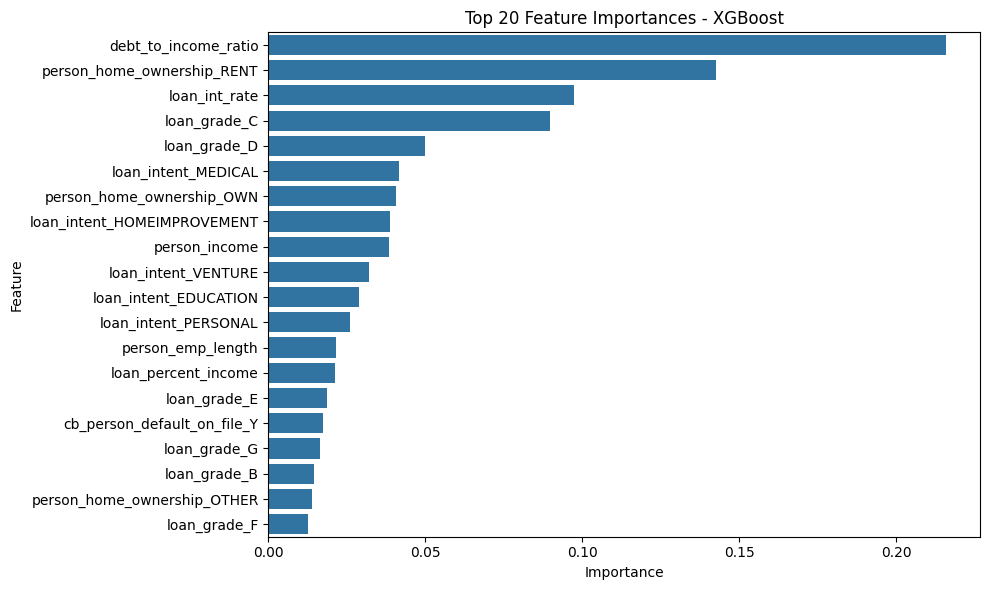

In [7]:
# Step 5: Feature Importance Using XGBoost (Built-in)
model = grid_xgb.best_estimator_
importances = model.feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title('Top 20 Feature Importances - XGBoost')
plt.tight_layout()
plt.savefig('../reports/feature_importance_xgb.png')
print("✅ Feature importance plot saved to reports/feature_importance_xgb.png")